# Imported Admission Dataset

In [66]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('Admission_Predict_Ver2.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# View Column Information

In [2]:
print(df.describe())

       Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  500.000000  500.000000   500.000000         500.000000  500.000000   
mean   250.500000  316.472000   107.192000           3.114000    3.374000   
std    144.481833   11.295148     6.081868           1.143512    0.991004   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    125.750000  308.000000   103.000000           2.000000    2.500000   
50%    250.500000  317.000000   107.000000           3.000000    3.500000   
75%    375.250000  325.000000   112.000000           4.000000    4.000000   
max    500.000000  340.000000   120.000000           5.000000    5.000000   

            LOR         CGPA    Research  Chance of Admit   
count  500.00000  500.000000  500.000000         500.00000  
mean     3.48400    8.576440    0.560000           0.72174  
std      0.92545    0.604813    0.496884           0.14114  
min      1.00000    6.800000    0.000000           0.34000  
2

# View Data

In [3]:
print(df.head())
print(df.info())

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 

# Checking Columns with Zeros

In [4]:
print('Columns With Zero')
print((df==0).sum())

Columns With Zero
Serial No.             0
GRE Score              0
TOEFL Score            0
University Rating      0
SOP                    0
LOR                    0
CGPA                   0
Research             220
Chance of Admit        0
dtype: int64


# Since, the Research Column is in the binary format hence, there are 220 0's

# Checking Columns with Nulls

In [5]:
print('Columns With Nulls')
df.isnull().sum()

Columns With Nulls


Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

# Dropping the Serial No. column as it is not required

In [6]:
df = df.drop('Serial No.', axis = 1) 
print(df.head())

   GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0        337          118                  4  4.5   4.5  9.65         1   
1        324          107                  4  4.0   4.5  8.87         1   
2        316          104                  3  3.0   3.5  8.00         1   
3        322          110                  3  3.5   2.5  8.67         1   
4        314          103                  2  2.0   3.0  8.21         0   

   Chance of Admit   
0              0.92  
1              0.76  
2              0.72  
3              0.80  
4              0.65  


# Applying Linear Regression on the dataset

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]
y = df['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=150)
lr = LinearRegression().fit(X_train, y_train)

# Results

In [8]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)*100))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)*100))

Training set score: 82.94
Test set score: 80.08


In [9]:
# Define a new dataframe for final results 
data = {'Algorithms': ['Linear Regression'], 
        'Train Score': [lr.score(X_train,y_train)*100], 
        'Test Score': [lr.score(X_test, y_test)*100]} 

# Storing the results for final comparision

In [10]:
dfnew = pd.DataFrame(data)
print(dfnew)

          Algorithms  Train Score  Test Score
0  Linear Regression    82.944361   80.082878


# Applying Support Vector Regression on the dataset

In [11]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt
X = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]
y = df['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=90)

# Results

In [12]:
svr_lin = SVR().fit(X_train, y_train)
accuracy_svr_lin_train = svr_lin.score(X_train, y_train)
accuracy_svr_lin_test = svr_lin.score(X_test, y_test)
print('Accuracy Linear Kernel on training set:', accuracy_svr_lin_train*100)
print('Accuracy Linear Kernel on testing set:', accuracy_svr_lin_test*100)


Accuracy Linear Kernel on training set: 64.94116164223882
Accuracy Linear Kernel on testing set: 71.66100706443024


# Storing the results for final comparision

In [13]:
dfnew = dfnew.append({'Algorithms' : 'SVR' , 'Train Score' : accuracy_svr_lin_train*100,
                      'Test Score' : accuracy_svr_lin_test*100} , ignore_index=True)
print(dfnew)

          Algorithms  Train Score  Test Score
0  Linear Regression    82.944361   80.082878
1                SVR    64.941162   71.661007


# Applying Support Vector Regression with rbf kernel on the dataset

In [14]:
X = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]
y = df['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=150)
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1).fit(X_train, y_train)
accuracy_svr_rbf_train = svr_rbf.score(X_train, y_train)
accuracy_svr_rbf_test = svr_rbf.score(X_test, y_test)
print('Accuracy Linear Kernel on training set:', accuracy_svr_rbf_train*100)
print('Accuracy Linear Kernel on testing set:', accuracy_svr_rbf_test*100)


Accuracy Linear Kernel on training set: 74.39099582599796
Accuracy Linear Kernel on testing set: 60.146619714858694


In [15]:
dfnew = dfnew.append({'Algorithms' : 'SVR with rbf' , 'Train Score' : accuracy_svr_rbf_train*100,
                      'Test Score' : accuracy_svr_rbf_test*100} , ignore_index=True)
print(dfnew)

          Algorithms  Train Score  Test Score
0  Linear Regression    82.944361   80.082878
1                SVR    64.941162   71.661007
2       SVR with rbf    74.390996   60.146620


# Performing Grid Search for SVR

In [16]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100], 'gamma':[1,0.1,0.01,0.001]}

In [17]:
grid = GridSearchCV(SVR(kernel='rbf'), param_grid, refit = True, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 2/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 3/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 4/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 5/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 1/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 2/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 3/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 4/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 5/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 1/5] END ..............................C=0.1, gamma=0.01; total time=   0.0s
[CV 2/5] END ..............................C=0.1

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=3)

In [18]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.001, epsilon=.1).fit(X_train, y_train)
accuracy_svr_rbf_train = svr_rbf.score(X_train, y_train)
accuracy_svr_rbf_test = svr_rbf.score(X_test, y_test)
print('Accuracy Linear Kernel on training set:', accuracy_svr_rbf_train*100)
print('Accuracy Linear Kernel on testing set:', accuracy_svr_rbf_test*100)

Accuracy Linear Kernel on training set: 80.3622283801101
Accuracy Linear Kernel on testing set: 75.41807502829663


In [19]:
dfnew = dfnew.append({'Algorithms' : 'SVR with rbf using GRIDSearch' , 'Train Score' : accuracy_svr_rbf_train*100,
                      'Test Score' : accuracy_svr_rbf_test*100} , ignore_index=True)
print(dfnew)

                      Algorithms  Train Score  Test Score
0              Linear Regression    82.944361   80.082878
1                            SVR    64.941162   71.661007
2                   SVR with rbf    74.390996   60.146620
3  SVR with rbf using GRIDSearch    80.362228   75.418075


# Lets Convert this dataset into a Classification Problem

In [20]:
import matplotlib.pyplot as plt

# Defining Custom Bins as per requirment

In [21]:
bins_list = [0.3, 0.6, 0.8, 1]

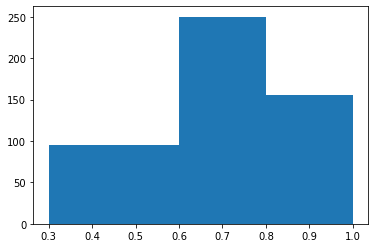

In [22]:
ax = plt.hist(df['Chance of Admit '], bins = bins_list)

# Creating a New Column for Classification

In [23]:
df.loc[(df['Chance of Admit '] >= 0.3) & (df['Chance of Admit '] <= 0.6), 'COA_classified'] = 'Low'
df.loc[(df['Chance of Admit '] >= 0.6) & (df['Chance of Admit '] <= 0.8), 'COA_classified'] = 'Medium'
df.loc[(df['Chance of Admit '] >= 0.8) & (df['Chance of Admit '] <= 1), 'COA_classified'] = 'High'

In [24]:
print(df)

     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0          337          118                  4  4.5   4.5  9.65         1   
1          324          107                  4  4.0   4.5  8.87         1   
2          316          104                  3  3.0   3.5  8.00         1   
3          322          110                  3  3.5   2.5  8.67         1   
4          314          103                  2  2.0   3.0  8.21         0   
..         ...          ...                ...  ...   ...   ...       ...   
495        332          108                  5  4.5   4.0  9.02         1   
496        337          117                  5  5.0   5.0  9.87         1   
497        330          120                  5  4.5   5.0  9.56         1   
498        312          103                  4  4.0   5.0  8.43         0   
499        327          113                  4  4.5   4.5  9.04         0   

     Chance of Admit  COA_classified  
0                0.92           High

# Performing Checks for new column

In [25]:
# check zeros
print('Columns With Zero')
print((df==0).sum())

# check nulls
print('Columns With Nulls')
df.isnull().sum()

Columns With Zero
GRE Score              0
TOEFL Score            0
University Rating      0
SOP                    0
LOR                    0
CGPA                   0
Research             220
Chance of Admit        0
COA_classified         0
dtype: int64
Columns With Nulls


GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
COA_classified       0
dtype: int64

# Applying Decision Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier
X = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]
y = df['COA_classified']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=280)
dtree = DecisionTreeClassifier(random_state=150)
dtree.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(dtree.score(X_train, y_train)*100))
print("Accuracy on test set: {:.2f}".format(dtree.score(X_test, y_test)*100))

Accuracy on training set: 100.00
Accuracy on test set: 76.80


# Overfitting is obeserved. Lets try entropy for better splitting and provide max depth as per requirement

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
tree = DecisionTreeClassifier(criterion="entropy",max_depth=5, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(tree.score(X_train, y_train)*100))
print("Accuracy on test set: {:.2f}".format(tree.score(X_test, y_test)*100))
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 86.13
Accuracy on test set: 83.20
Accuracy on training set: 1.000
Accuracy on test set: 0.808


In [32]:
dfnew = dfnew.append({'Algorithms' : 'DecisionTreeClassifier' , 'Train Score' : tree.score(X_train, y_train)*100,
                      'Test Score' : tree.score(X_test, y_test)*100} , ignore_index=True)
print(dfnew)

                      Algorithms  Train Score  Test Score
0              Linear Regression    82.944361   80.082878
1                            SVR    64.941162   71.661007
2                   SVR with rbf    74.390996   60.146620
3  SVR with rbf using GRIDSearch    80.362228   75.418075
4         DecisionTreeClassifier    86.133333   83.200000


# Applying RandomForestClassifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
X = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]
y = df['COA_classified']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=280)

forest = RandomForestClassifier(n_estimators=25, random_state=150,criterion="entropy",max_depth=5)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))


Accuracy on training set: 0.891
Accuracy on test set: 0.840


In [34]:
dfnew = dfnew.append({'Algorithms' : 'RandomForestClassifier' , 'Train Score' : forest.score(X_train, y_train)*100,
                      'Test Score' : forest.score(X_test, y_test)*100} , ignore_index=True)
print(dfnew)

                      Algorithms  Train Score  Test Score
0              Linear Regression    82.944361   80.082878
1                            SVR    64.941162   71.661007
2                   SVR with rbf    74.390996   60.146620
3  SVR with rbf using GRIDSearch    80.362228   75.418075
4         DecisionTreeClassifier    86.133333   83.200000
5         RandomForestClassifier    89.066667   84.000000


# Applying GradientBoostingClassifier

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
X = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]
y = df['COA_classified']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=280)

gbrt = GradientBoostingClassifier(n_estimators=20, random_state=0, learning_rate=0.1, max_depth=2)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.853
Accuracy on test set: 0.832


In [36]:
dfnew = dfnew.append({'Algorithms' : 'GradientBoostingClassifier' , 'Train Score' : gbrt.score(X_train, y_train)*100,
                      'Test Score' : gbrt.score(X_test, y_test)*100} , ignore_index=True)
print(dfnew)

                      Algorithms  Train Score  Test Score
0              Linear Regression    82.944361   80.082878
1                            SVR    64.941162   71.661007
2                   SVR with rbf    74.390996   60.146620
3  SVR with rbf using GRIDSearch    80.362228   75.418075
4         DecisionTreeClassifier    86.133333   83.200000
5         RandomForestClassifier    89.066667   84.000000
6     GradientBoostingClassifier    85.333333   83.200000


# Applying Naive Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB
X = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]
y = df['COA_classified']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=150)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gnb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gnb.score(X_test, y_test)))

Accuracy on training set: 0.821
Accuracy on test set: 0.776


In [38]:
dfnew = dfnew.append({'Algorithms' : 'GaussianNB' , 'Train Score' : gnb.score(X_train, y_train)*100,
                      'Test Score' : gnb.score(X_test, y_test)*100} , ignore_index=True)
print(dfnew)

                      Algorithms  Train Score  Test Score
0              Linear Regression    82.944361   80.082878
1                            SVR    64.941162   71.661007
2                   SVR with rbf    74.390996   60.146620
3  SVR with rbf using GRIDSearch    80.362228   75.418075
4         DecisionTreeClassifier    86.133333   83.200000
5         RandomForestClassifier    89.066667   84.000000
6     GradientBoostingClassifier    85.333333   83.200000
7                     GaussianNB    82.133333   77.600000


# Applying KNN Classifier by first plotting the optimal number of neighbors required

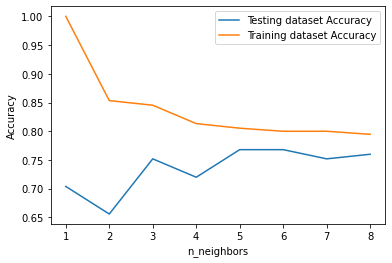

In [39]:
from sklearn.neighbors import KNeighborsClassifier  
X = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]
y = df['COA_classified']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=280)
  
neighbors = np.arange(1, 9) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 
  
# Loop over K values 
for i, k in enumerate(neighbors): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train) 
      
    # Compute traning and test data accuracy 
    train_accuracy[i] = knn.score(X_train, y_train) 
    test_accuracy[i] = knn.score(X_test, y_test) 
  
# Generate plot 
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 
  
plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.show()

In [40]:
from sklearn.neighbors import KNeighborsClassifier  
X = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]
y = df['COA_classified']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=280)

knn = KNeighborsClassifier(n_neighbors=6) 
knn.fit(X_train, y_train) 

print("Accuracy on training set: {:.3f}".format(knn.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(X_test, y_test)))

Accuracy on training set: 0.800
Accuracy on test set: 0.768


In [41]:
dfnew = dfnew.append({'Algorithms' : 'KNNClassifier' , 'Train Score' : knn.score(X_train, y_train)*100,
                      'Test Score' : knn.score(X_test, y_test)*100} , ignore_index=True)
print(dfnew)

                      Algorithms  Train Score  Test Score
0              Linear Regression    82.944361   80.082878
1                            SVR    64.941162   71.661007
2                   SVR with rbf    74.390996   60.146620
3  SVR with rbf using GRIDSearch    80.362228   75.418075
4         DecisionTreeClassifier    86.133333   83.200000
5         RandomForestClassifier    89.066667   84.000000
6     GradientBoostingClassifier    85.333333   83.200000
7                     GaussianNB    82.133333   77.600000
8                  KNNClassifier    80.000000   76.800000


# Note : Logistic Regression cannot be applied on this dataset as it has 3 classes


# Applying Support Vector Machine

In [42]:
from sklearn import svm
X = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]
y = df['COA_classified']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=280)

In [43]:
clf = svm.SVC()
clf.fit(X_train,y_train)

print('Accuracy of SVC on training set: {:.2f}'.format(clf.score(X_train, y_train) * 100))

print('Accuracy of SVC on test set: {:.2f}'.format(clf.score(X_test, y_test) * 100))

Accuracy of SVC on training set: 49.87
Accuracy of SVC on test set: 53.60


In [44]:
dfnew = dfnew.append({'Algorithms' : 'SVM' , 'Train Score' : clf.score(X_train, y_train)*100,
                      'Test Score' : clf.score(X_test, y_test)*100} , ignore_index=True)
print(dfnew)

                      Algorithms  Train Score  Test Score
0              Linear Regression    82.944361   80.082878
1                            SVR    64.941162   71.661007
2                   SVR with rbf    74.390996   60.146620
3  SVR with rbf using GRIDSearch    80.362228   75.418075
4         DecisionTreeClassifier    86.133333   83.200000
5         RandomForestClassifier    89.066667   84.000000
6     GradientBoostingClassifier    85.333333   83.200000
7                     GaussianNB    82.133333   77.600000
8                  KNNClassifier    80.000000   76.800000
9                            SVM    49.866667   53.600000


# Applying SVM using Linear kernel

In [45]:
from sklearn import svm
X = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]
y = df['COA_classified']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=190)

linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)
accuracy_lin_train = linear.score(X_train, y_train)
accuracy_lin_test = linear.score(X_test, y_test)
print('Accuracy Linear Kernel on training set:', accuracy_lin_train*100)
print('Accuracy Linear Kernel on testing set:', accuracy_lin_test*100)

Accuracy Linear Kernel on training set: 83.42857142857143
Accuracy Linear Kernel on testing set: 82.66666666666667


In [46]:
dfnew = dfnew.append({'Algorithms' : 'SVM with linear' , 'Train Score' : accuracy_lin_train*100,
                      'Test Score' : accuracy_lin_test*100} , ignore_index=True)
print(dfnew)

                       Algorithms  Train Score  Test Score
0               Linear Regression    82.944361   80.082878
1                             SVR    64.941162   71.661007
2                    SVR with rbf    74.390996   60.146620
3   SVR with rbf using GRIDSearch    80.362228   75.418075
4          DecisionTreeClassifier    86.133333   83.200000
5          RandomForestClassifier    89.066667   84.000000
6      GradientBoostingClassifier    85.333333   83.200000
7                      GaussianNB    82.133333   77.600000
8                   KNNClassifier    80.000000   76.800000
9                             SVM    49.866667   53.600000
10                SVM with linear    83.428571   82.666667


# Applyin SVM using rbf kernel

In [47]:
rbf = svm.SVC(kernel='rbf', gamma=0.1, C=0.1, decision_function_shape='ovo').fit(X_train, y_train)
accuracy_rbf_train = rbf.score(X_train, y_train)
accuracy_rbf_test = rbf.score(X_test, y_test)
print('Accuracy Radial Basis Kernel on training set:', accuracy_rbf_train*100)
print('Accuracy Radial Basis Kernel on testing set:', accuracy_rbf_test*100)

Accuracy Radial Basis Kernel on training set: 64.28571428571429
Accuracy Radial Basis Kernel on testing set: 69.33333333333334


# Here, the rbf kernel is perfroming poorly because the data we are using is linearly separable and hence will perform best on linear kernel.

# Performing Grid Search on SVM

In [48]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [49]:
from sklearn.model_selection import GridSearchCV
X = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]
y = df['COA_classified']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=280)
param_grid = {'C':[0.1,1,10,100], 'gamma':[1,0.1,0.01,0.001]}

In [50]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 2/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 3/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 4/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 5/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 1/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 2/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 3/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 4/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 5/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 1/5] END ..............................C=0.1, gamma=0.01; total time=   0.0s
[CV 2/5] END ..............................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=3)

In [51]:
from sklearn import svm
X = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]
y = df['COA_classified']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=280)

clf = svm.SVC(C=100,gamma=0.001)
clf.fit(X_train,y_train)

print('Accuracy of SVC on training set: {:.2f}'.format(clf.score(X_train, y_train) * 100))

print('Accuracy of SVC on test set: {:.2f}'.format(clf.score(X_test, y_test) * 100))

Accuracy of SVC on training set: 83.20
Accuracy of SVC on test set: 80.80


In [52]:
dfnew = dfnew.append({'Algorithms' : 'SVM using Grid Search' , 'Train Score' : clf.score(X_train, y_train)*100,
                      'Test Score' : clf.score(X_test, y_test)*100} , ignore_index=True)
print(dfnew)

                       Algorithms  Train Score  Test Score
0               Linear Regression    82.944361   80.082878
1                             SVR    64.941162   71.661007
2                    SVR with rbf    74.390996   60.146620
3   SVR with rbf using GRIDSearch    80.362228   75.418075
4          DecisionTreeClassifier    86.133333   83.200000
5          RandomForestClassifier    89.066667   84.000000
6      GradientBoostingClassifier    85.333333   83.200000
7                      GaussianNB    82.133333   77.600000
8                   KNNClassifier    80.000000   76.800000
9                             SVM    49.866667   53.600000
10                SVM with linear    83.428571   82.666667
11          SVM using Grid Search    83.200000   80.800000


# Performing Grid Search on SVM using Linear

In [53]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
X = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]
y = df['COA_classified']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=190)

svm.fit(X_train,y_train)

SVC(kernel='linear')

In [54]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100]}

In [55]:
grid = GridSearchCV(SVC(kernel='linear'), param_grid, refit = True, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ..........................................C=0.1; total time=   0.0s
[CV 2/5] END ..........................................C=0.1; total time=   0.0s
[CV 3/5] END ..........................................C=0.1; total time=   0.0s
[CV 4/5] END ..........................................C=0.1; total time=   0.0s
[CV 5/5] END ..........................................C=0.1; total time=   0.0s
[CV 1/5] END ............................................C=1; total time=   0.0s
[CV 2/5] END ............................................C=1; total time=   0.0s
[CV 3/5] END ............................................C=1; total time=   0.0s
[CV 4/5] END ............................................C=1; total time=   0.0s
[CV 5/5] END ............................................C=1; total time=   0.0s
[CV 1/5] END ...........................................C=10; total time=   0.0s
[CV 2/5] END ....................................

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100]}, verbose=3)

In [56]:
from sklearn import svm
X = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]
y = df['COA_classified']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=190)

linear = svm.SVC(kernel='linear', C=10).fit(X_train, y_train)
accuracy_lin_train = linear.score(X_train, y_train)
accuracy_lin_test = linear.score(X_test, y_test)
print('Accuracy Linear Kernel on training set:', accuracy_lin_train*100)
print('Accuracy Linear Kernel on testing set:', accuracy_lin_test*100)

Accuracy Linear Kernel on training set: 83.71428571428572
Accuracy Linear Kernel on testing set: 82.66666666666667


In [57]:
dfnew = dfnew.append({'Algorithms' : 'SVM with Linear using Grid Search' , 'Train Score' : accuracy_lin_train*100,
                      'Test Score' : accuracy_lin_test*100} , ignore_index=True)
print(dfnew)

                           Algorithms  Train Score  Test Score
0                   Linear Regression    82.944361   80.082878
1                                 SVR    64.941162   71.661007
2                        SVR with rbf    74.390996   60.146620
3       SVR with rbf using GRIDSearch    80.362228   75.418075
4              DecisionTreeClassifier    86.133333   83.200000
5              RandomForestClassifier    89.066667   84.000000
6          GradientBoostingClassifier    85.333333   83.200000
7                          GaussianNB    82.133333   77.600000
8                       KNNClassifier    80.000000   76.800000
9                                 SVM    49.866667   53.600000
10                    SVM with linear    83.428571   82.666667
11              SVM using Grid Search    83.200000   80.800000
12  SVM with Linear using Grid Search    83.714286   82.666667


# Gram Matrix 

In [58]:
from sklearn import svm
X = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]
y = df['COA_classified']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=190)

In [59]:
clf = svm.SVC(kernel='precomputed')

In [60]:
gram_train = np.dot(X_train, X_train.T)
clf.fit(gram_train, y_train)

SVC(kernel='precomputed')

In [61]:
gram_test = np.dot(X_test, X_train.T)
clf.predict(gram_test)

array(['Medium', 'Medium', 'High', 'Medium', 'Low', 'High', 'High',
       'High', 'Medium', 'High', 'Medium', 'Low', 'Medium', 'High',
       'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'High', 'High',
       'Low', 'Medium', 'Medium', 'Medium', 'Medium', 'High', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'High', 'High',
       'High', 'Medium', 'High', 'Low', 'High', 'Medium', 'High', 'Low',
       'Low', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Low', 'High', 'Low', 'Medium', 'Medium', 'Low', 'Low',
       'Low', 'Medium', 'Low', 'Medium', 'Low', 'Low', 'Medium', 'Low',
       'Medium', 'High', 'Low', 'Medium', 'Medium', 'Medium', 'High',
       'Medium', 'High', 'Medium', 'High', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'High', 'Medium', 'Medium', 'High', 'Medium',
       'Low', 'Medium', 'Low', 'Medium', 'High', 'Medium', 'Medium',
       'High', 'High', 'Medium', 'High', 'High', 'High', 'High', 'High',

In [62]:
print('Accuracy of SVC on training set: {:.2f}'.format(clf.score(gram_train, y_train) * 100))
print('Accuracy of SVC on training set: {:.2f}'.format(clf.score(gram_test, y_test) * 100))

Accuracy of SVC on training set: 83.43
Accuracy of SVC on training set: 82.67


In [63]:
dfnew = dfnew.append({'Algorithms' : 'SVM using GRAM Matrix' , 'Train Score' : clf.score(gram_train, y_train)*100,
                      'Test Score' : clf.score(gram_test, y_test)*100} , ignore_index=True)
print(dfnew)

                           Algorithms  Train Score  Test Score
0                   Linear Regression    82.944361   80.082878
1                                 SVR    64.941162   71.661007
2                        SVR with rbf    74.390996   60.146620
3       SVR with rbf using GRIDSearch    80.362228   75.418075
4              DecisionTreeClassifier    86.133333   83.200000
5              RandomForestClassifier    89.066667   84.000000
6          GradientBoostingClassifier    85.333333   83.200000
7                          GaussianNB    82.133333   77.600000
8                       KNNClassifier    80.000000   76.800000
9                                 SVM    49.866667   53.600000
10                    SVM with linear    83.428571   82.666667
11              SVM using Grid Search    83.200000   80.800000
12  SVM with Linear using Grid Search    83.714286   82.666667
13              SVM using GRAM Matrix    83.428571   82.666667


In [64]:
dffinal = dfnew.sort_values(by=['Train Score'],ascending=False)
print(dffinal)
print(dffinal.info())

                           Algorithms  Train Score  Test Score
5              RandomForestClassifier    89.066667   84.000000
4              DecisionTreeClassifier    86.133333   83.200000
6          GradientBoostingClassifier    85.333333   83.200000
12  SVM with Linear using Grid Search    83.714286   82.666667
10                    SVM with linear    83.428571   82.666667
13              SVM using GRAM Matrix    83.428571   82.666667
11              SVM using Grid Search    83.200000   80.800000
0                   Linear Regression    82.944361   80.082878
7                          GaussianNB    82.133333   77.600000
3       SVR with rbf using GRIDSearch    80.362228   75.418075
8                       KNNClassifier    80.000000   76.800000
2                        SVR with rbf    74.390996   60.146620
1                                 SVR    64.941162   71.661007
9                                 SVM    49.866667   53.600000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 en

Text(0, 0.5, 'Accuracy in %')

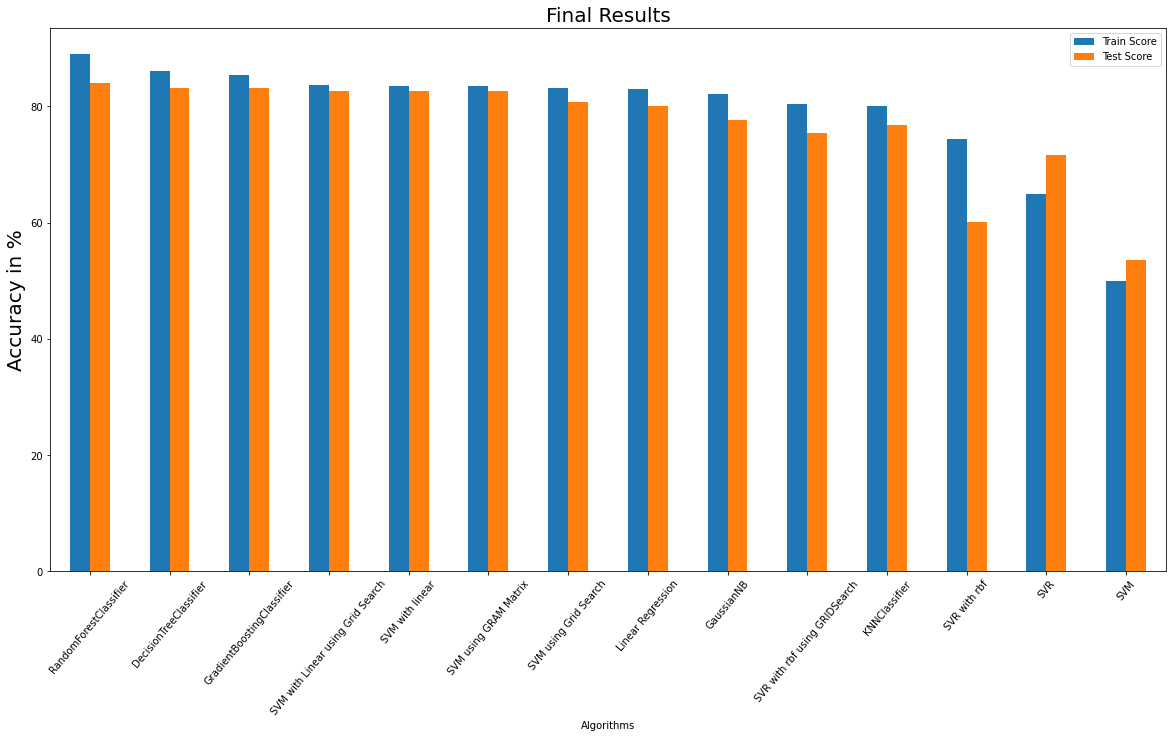

In [65]:
dffinal.plot.bar(x='Algorithms',rot=50,figsize=(20,10))
plt.title('Final Results', fontsize=20)
plt.ylabel('Accuracy in %', fontsize=20)

# Conclusion: After using a total set of 14 algorithms, we arrive at the following conclusion.

# For predicting if the student will get admission in the university or not, we should use Random Forest Classifier for this dataset, as it has the highest training and testing acccuracy, 89% and 84% respectively.